# Predicting Genre by Word Usage

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, plot_confusion_matrix
import seaborn as sns

In [2]:
sns.set_theme(
    context='talk',
    style='white',
)

First, manipulating data into rows of track ID, and columns of word usages (so that it can be plugged into a SVM or NB model)

In [3]:
genre_and_lyrics = pd.read_csv(r'datasets/genre_and_lyrics.csv')
genre_and_lyrics = (genre_and_lyrics
                    .loc[genre_and_lyrics['genre']
                    .isin(['Rock', 'Pop', 'Hip-Hop', 'Country'])])
#genre_and_lyrics = genre_and_lyrics[['track_id', 'genre', 'word']]


In [4]:
genre_and_lyrics = pd.pivot_table(
    genre_and_lyrics,
    values='count',
    index=['track_id', 'genre'],
    columns='word',
).reset_index().fillna(0)

In [5]:
labels = genre_and_lyrics['genre']
features = genre_and_lyrics[genre_and_lyrics.columns[2:]]

In [6]:
labels = labels.apply(lambda x: {'Rock':1, 'Pop':2, 'Hip-Hop':3, 'Country':4}[x])

In [7]:
train_features, test_features, train_labels, test_labels = train_test_split(
    features,
    labels,
    test_size=0.2,
)

In [8]:
# clear some space
del genre_and_lyrics, labels, features

# Model Comparison

In [9]:
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
nb_model.fit(train_features, train_labels)
score = nb_model.score(test_features, test_labels)
print(score)

0.5804528379915223


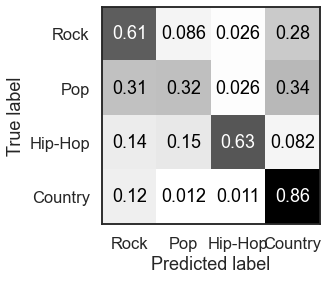

In [10]:
matrix = plot_confusion_matrix(
    nb_model,
    test_features,
    test_labels,
    normalize='true',
    cmap='Greys',
    colorbar=False,
    display_labels=['Rock', 'Pop', 'Hip-Hop', 'Country'],
)

Interestingly, Naive Bayes performs by far the best on Country which it is correct on most of the time. It also performs poorly on Pop, which is categorises as Rock and Country regularly. 

In [11]:
from sklearn.svm import LinearSVC
svc_model = LinearSVC()
svc_model.fit(train_features[:1000], train_labels[:1000])
score = svc_model.score(test_features, test_labels)
print(score)

0.6483440741634214


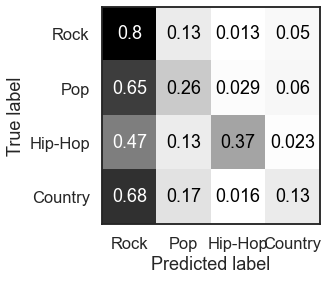

In [12]:
matrix = plot_confusion_matrix(
    svc_model,
    test_features,
    test_labels,
    normalize='true',
    cmap='Greys',
    colorbar=False,
    display_labels=['Rock', 'Pop', 'Hip-Hop', 'Country'],
)

The SVC model looks a lot higher from the accuracy score, but then looking at the confusion matrix it looks like the only reason for this is that it thinks almost everything is rock which is the most common genre. Every genre, except Rock, is predicted to be Rock more times that it is itself.